
# Библиотека `polars`

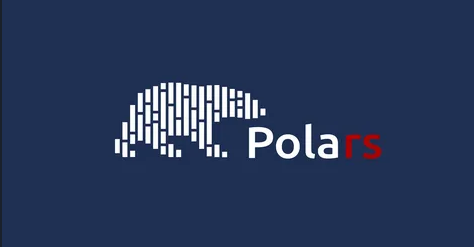![polars.jpg](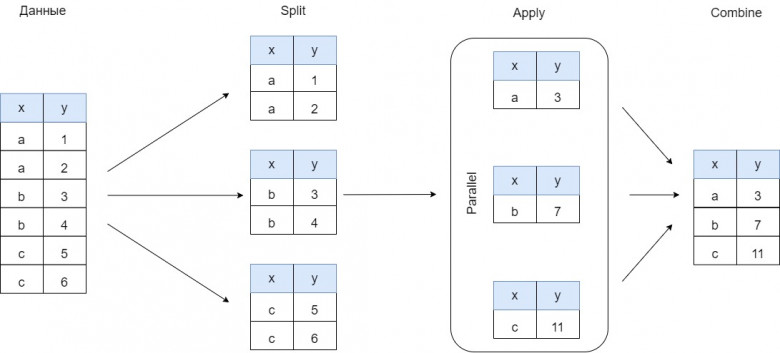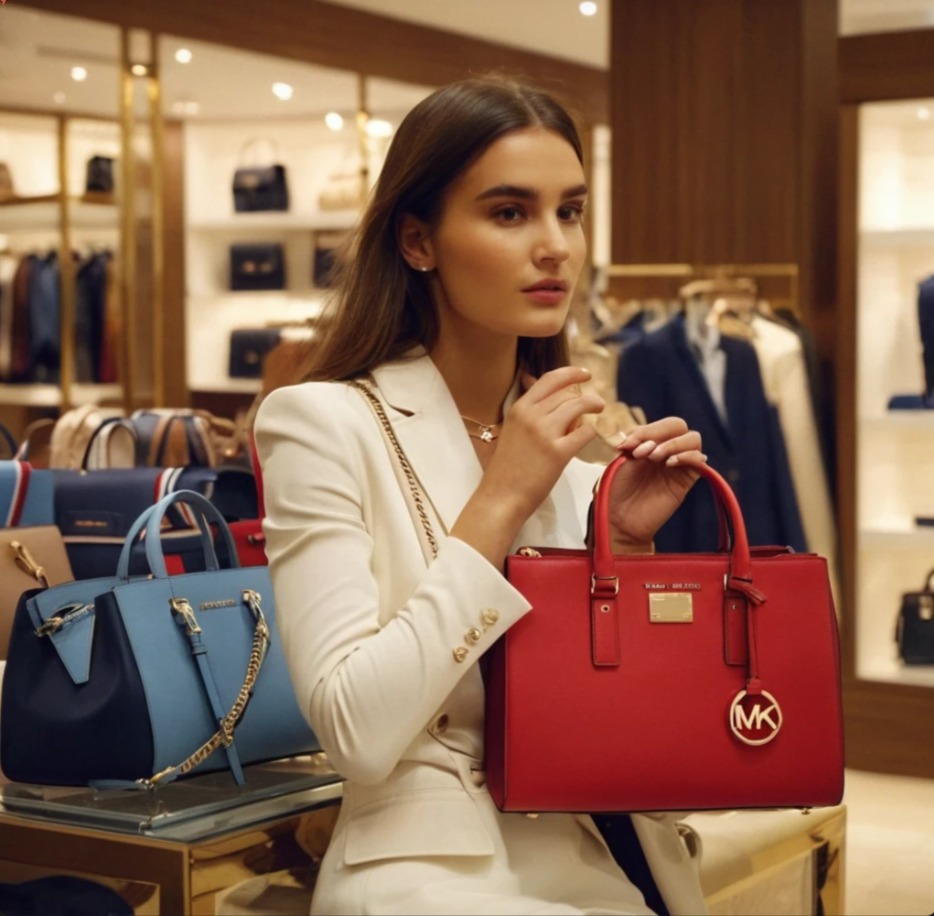)

`Polars` - это высокопроизводительная библиотека фреймов данных, разработанная для обеспечения быстрой и эффективной обработки данных. Вдохновленный действующей библиотекой `pandas`, `Polars` выводит работу на новый уровень, предлагая бесшовный опыт работы с большими наборами данных, которые могут не поместиться в памяти.`Polars` сочетает в себе гибкость и удобство использования `Python` со скоростью и масштабируемостью `Rust`, что делает его привлекательным выбором для широкого спектра задач обработки данных.

Одна из ключевых особенностей Polars заключается в том, что он полностью написан на Rust, но вам не нужно знать Rust, чтобы его использовать, потому что у него есть пакет Python, который предлагает интерфейс, аналогичный Pandas.


![Текст ссылки](https://habrastorage.org/r/w1560/getpro/habr/upload_files/f47/ffa/6d6/f47ffa6d6c6428b027f8ba64cec02435.png)

Результаты, основанные на данных в памяти (чем меньше, тем лучше)



Как мы видим, разница в скорости невероятная. Важно понимать, что сам по себе Rust не является причиной прироста производительности. Всё дело в том, что Polars использует все ядра компьютера, и это реализовано на системном уровне. Pandas работает в однопоточном режиме.

На этом отличия не заканчиваются. Polars предлагает на выбор два API: eager и lazy. Eager такое же как у Pandas, т.е. код выполняется незамедлительно. Напротив, lazy выполнение не запускается до тех пор, пока этого не потребуется, что делает код эффективнее, поскольку позволяет избежать исполнения ненужных инструкций, что как следствие повышает производительность.


# **Установка и использование**

Для установки необходимо выполнить команду в терминале:


In [ ]:
pip install polars

Проверяем что Polars точно установлен, выведем версию.

In [ ]:
import polars as pl
print(pl.__version__)

0.20.2


Прочтём датафрейм с помощью Polars.

In [ ]:
df = pl.read_csv("https://j.mp/iriscsv")

In [ ]:
df

sepal_length,sepal_width,petal_length,petal_width,species
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""setosa"""
4.9,3.0,1.4,0.2,"""setosa"""
4.7,3.2,1.3,0.2,"""setosa"""
4.6,3.1,1.5,0.2,"""setosa"""
5.0,3.6,1.4,0.2,"""setosa"""
5.4,3.9,1.7,0.4,"""setosa"""
4.6,3.4,1.4,0.3,"""setosa"""
5.0,3.4,1.5,0.2,"""setosa"""
4.4,2.9,1.4,0.2,"""setosa"""


В данном датафрейме приведена информация о цветочка:длине и ширине чашелистника, лепестков и видах цветов.Он разобран по колонкам и типам данных, точно также, как если бы мы использовали Pandas.

Методы `head()` в `Polars` и `Pandas` идентичены , они выводят данные из верхних строчек

In [ ]:
import polars as pl
df = pl.read_csv("https://j.mp/iriscsv")
df.head(2)


sepal_length,sepal_width,petal_length,petal_width,species
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""setosa"""
4.9,3.0,1.4,0.2,"""setosa"""


Попробуем отфильровать эти данные. Для этого необходимо вызвать метод `df.filter()`, который является аналогом `query()` в Pandas. Отфильтруем только те записи, у которых значение `sepal_length > 6`:

In [ ]:
df.filter(pl.col("sepal_length") > 6)

sepal_length,sepal_width,petal_length,petal_width,species
f64,f64,f64,f64,str
7.0,3.2,4.7,1.4,"""versicolor"""
6.4,3.2,4.5,1.5,"""versicolor"""
6.9,3.1,4.9,1.5,"""versicolor"""
6.5,2.8,4.6,1.5,"""versicolor"""
6.3,3.3,4.7,1.6,"""versicolor"""
6.6,2.9,4.6,1.3,"""versicolor"""
6.1,2.9,4.7,1.4,"""versicolor"""
6.7,3.1,4.4,1.4,"""versicolor"""
6.2,2.2,4.5,1.5,"""versicolor"""


В данной строчке кода идет обращение к библиоте (`pl`) и использование функции `col` из нее, которая позволяет обратиться к столбцу в объекте DataFrame.

Теперь попробуем сгруппировать и агрегировать записи:

In [ ]:

filtered = (df.filter(pl.col("sepal_length") > 6)
  .groupby('species', maintain_order=True)
  .agg(pl.all().sum())
)
print(filtered)

shape: (2, 5)
┌────────────┬──────────────┬─────────────┬──────────────┬─────────────┐
│ species    ┆ sepal_length ┆ sepal_width ┆ petal_length ┆ petal_width │
│ ---        ┆ ---          ┆ ---         ┆ ---          ┆ ---         │
│ str        ┆ f64          ┆ f64         ┆ f64          ┆ f64         │
╞════════════╪══════════════╪═════════════╪══════════════╪═════════════╡
│ versicolor ┆ 129.0        ┆ 57.8        ┆ 91.7         ┆ 28.4        │
│ virginica  ┆ 277.9        ┆ 124.5       ┆ 233.0        ┆ 84.3        │
└────────────┴──────────────┴─────────────┴──────────────┴─────────────┘


<ipython-input-8-671531146ecc>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  filtered = (df.filter(pl.col("sepal_length") > 6)


В данном примере так же выполняется фильтрация по столбцу `sepal_length`, также провизводится группировка `groupby()` по столбцу `species` , где `maintain_order=True` указывает на то, что порядок значений в исходном датафрейме должен быть сохранен при группировке по выбранному столбцу *вид*,и агригирование `agg()`, где `all()` обозначает лоигическую операцию 'И'  , и по итогу результаты будут суммированны при помощи `sum()`

Для сравнения, давайте посмотрим как будет выглядеть код, если написать такой же фильтр с помощью Pandas:

In [ ]:
import pandas as pd

df = pd.read_csv("https://j.mp/iriscsv")

df.query('sepal_length > 6') \
  .groupby('species').sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
versicolor,129.0,57.8,91.7,28.4
virginica,277.9,124.5,233.0,84.3


from matplotlib import pyplot as plt
_df_0['sepal_length'].plot(kind='hist', bins=20, title='sepal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sepal_width'].plot(kind='hist', bins=20, title='sepal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['petal_length'].plot(kind='hist', bins=20, title='petal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['petal_width'].plot(kind='hist', bins=20, title='petal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='sepal_length', y='sepal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sepal_width', y='petal_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='petal_length', y='petal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sepal_length']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sepal_length'}, axis=1)
              .sort_values('sepal_length', ascending=True))
  xs = counted['sepal_length']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('sepal_length', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sepal_length')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sepal_width']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sepal_width'}, axis=1)
              .sort_values('sepal_width', ascending=True))
  xs = counted['sepal_width']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('sepal_width', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sepal_width')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['petal_length']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'petal_length'}, axis=1)
              .sort_values('petal_length', ascending=True))
  xs = counted['petal_length']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('petal_length', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal_length')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['petal_width']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'petal_width'}, axis=1)
              .sort_values('petal_width', ascending=True))
  xs = counted['petal_width']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('petal_width', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal_width')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['sepal_length'].plot(kind='line', figsize=(8, 4), title='sepal_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['sepal_width'].plot(kind='line', figsize=(8, 4), title='sepal_width')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['petal_length'].plot(kind='line', figsize=(8, 4), title='petal_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['petal_width'].plot(kind='line', figsize=(8, 4), title='petal_width')
plt.gca().spines[['top', 'right']].set_visible(False)

Давайте взглянем на Lazy API. Попробуем переписать этот фильтр.


In [ ]:
(pl.read_csv("https://j.mp/iriscsv")
    .lazy()
    .filter(pl.col('sepal_length') > 6)
    .groupby('species', maintain_order=True)
    .agg(pl.all().sum())
    .collect()
)

<ipython-input-2-fb977ded7dcc>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  (pl.read_csv("https://j.mp/iriscsv")


species,sepal_length,sepal_width,petal_length,petal_width
str,f64,f64,f64,f64
"""versicolor""",129.0,57.8,91.7,28.4
"""virginica""",277.9,124.5,233.0,84.3


`Eager mode `(нетерпеливый режим) – операции выполняются немедленно, результат выполнения доступен в памяти. Для каждой операции требуется выделить фрейм данных, что не очень хорошо для памяти.
`Lazy mode` (ленивый режим) – при запуске кода операции не выполняются сразу же, а добавляются в план запроса.

В Polars мы можем оперировать теми же сущностями, с которыми привыкли работать с Pandas: `series`.



In [ ]:
pl.Series([1,2,3])

""
i64
1
2
3


In [ ]:
import polars as pl
sample_parquet = pl.read_parquet('https://github.com/kaysush/sample-parquet-files/blob/main/part-00000-a9e77425-5fb4-456f-ba52-f821123bd193-c000.snappy.parquet?raw=true')



In [ ]:
# describe() покажет нам всю информацию о каждом столбце
sample_parquet.describe()

describe,id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments,part-00000-a9e77425-5fb4-456f-ba52-f821123bd193-c000.snappy.parquet?raw
str,f64,str,str,str,str,str,str,str,str,f64,str,str,str
"""count""",1000.0,"""1000""","""1000""","""1000""","""1000""","""995""","""1000""","""1000""","""1000""",932.0,"""1000""","""994""","""1000"""
"""null_count""",0.0,"""0""","""0""","""0""","""0""","""5""","""0""","""0""","""0""",68.0,"""0""","""6""","""0"""
"""mean""",500.5,null,null,null,null,null,null,null,null,149005.356652,null,null,null
"""std""",288.819436,null,null,null,null,null,null,null,null,79785.176736,null,null,null
"""min""",1.0,"""""","""Adams""","""""","""""","""0.14.221.162""","""""","""""Bonaire""","""""",12380.49,"""""","""""","""True"""
"""25%""",251.0,null,null,null,null,null,null,null,null,81578.38,null,null,null
"""50%""",501.0,null,null,null,null,null,null,null,null,147568.54,null,null,null
"""75%""",750.0,null,null,null,null,null,null,null,null,220086.62,null,null,null
"""max""",1000.0,"""Willie""","""Young""","""wweaver2r@goog…","""Male""","""99.159.168.233…","""67718647521473…","""Zimbabwe""","""9/9/1981""",286592.99,"""Web Developer …","""𠜎𠜱𠝹𠱓𠱸𠲖𠳏""","""True"""


In [ ]:
# sample(3) покажет нам 3 случайные записи
sample_parquet.sample(3)

id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments,part-00000-a9e77425-5fb4-456f-ba52-f821123bd193-c000.snappy.parquet?raw
i32,str,str,str,str,str,str,str,str,f64,str,str,bool
978,"""Billy""","""Young""","""byoungr5@ftc.g…","""Male""","""221.233.59.129…","""49033734591102…","""China""","""6/19/1970""",267658.75,"""Graphic Design…","""""",true
361,"""Howard""","""Tucker""","""htuckera0@cdc.…","""Male""","""37.17.13.196""","""35323639466858…","""Philippines""","""3/7/2000""",164723.77,"""Senior Sales A…","""""",true
451,"""Alice""","""Hanson""","""ahansonci@desd…","""Female""","""163.161.206.64…","""35676458937960…","""China""","""1/8/1981""",279777.18,"""Director of Sa…","""""",true


In [ ]:
# Мы можем выбрать определённый набор столбцов
sample_parquet.select(pl.col(['id', 'first_name', 'last_name']))


id,first_name,last_name
i32,str,str
1,"""Amanda""","""Jordan"""
2,"""Albert""","""Freeman"""
3,"""Evelyn""","""Morgan"""
4,"""Denise""","""Riley"""
5,"""Carlos""","""Burns"""
6,"""Kathryn""","""White"""
7,"""Samuel""","""Holmes"""
8,"""Harry""","""Howell"""
9,"""Jose""","""Foster"""


Так же мы может перевести датафрейм из `Polars`  в `Pandas` используя метод  `to_pandas()`

In [ ]:
import polars as pl
sample_parquet = pl.read_parquet('https://github.com/kaysush/sample-parquet-files/blob/main/part-00000-a9e77425-5fb4-456f-ba52-f821123bd193-c000.snappy.parquet?raw=true')

sample_parquet.head(2).to_pandas()

,id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments,part-00000-a9e77425-5fb4-456f-ba52-f821123bd193-c000.snappy.parquet?raw
0,1,Amanda,Jordan,ajordan0@com.com,Female,None,6759521864920116,Indonesia,3/8/1971,49756.53,Internal Auditor,1E+02,True
1,2,Albert,Freeman,afreeman1@is.gd,Male,218.111.175.34,,Canada,1/16/1968,150280.17,Accountant IV,,True


Так же хочу обратить ваше внимание на то что по сравнениею с `Pandas`  `Polars`выводит тип данных столбцов.

# **Фильтрация**

Для примера давайте напишем фильтр, который будет фильтровать пользователей по зарплате:


In [ ]:
sample_parquet.filter(
    pl.col('salary').is_between(100000.0, 150000.0)
)

id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments,part-00000-a9e77425-5fb4-456f-ba52-f821123bd193-c000.snappy.parquet?raw
i32,str,str,str,str,str,str,str,str,f64,str,str,bool
3,"""Evelyn""","""Morgan""","""emorgan2@alter…","""Female""","""7.161.136.94""","""67671190719015…","""Russia""","""2/1/1960""",144972.51,"""Structural Eng…","""""",true
17,"""Emily""","""Andrews""","""eandrewsg@corn…","""Female""","""29.231.180.172…","""30271790537626…","""Russia""","""4/13/1990""",116800.65,"""Food Chemist""","""""",true
20,"""Rebecca""","""Bell""","""rbellj@bandcam…","""Female""","""172.215.104.12…","""""","""China""","""""",137251.19,"""""","""""",true
22,"""Lawrence""","""Ramos""","""lramosl@source…","""Male""","""46.72.4.6""","""35374738108556…","""Tanzania""","""""",131283.64,"""""","""""",true
28,"""Samuel""","""Hunter""","""shunterr@insta…","""Male""","""72.190.230.173…","""50023537973898…","""Brazil""","""9/21/1968""",108950.24,"""Environmental …","""""",true
30,"""Annie""","""Torres""","""atorrest@ning.…","""Female""","""202.94.67.27""","""35303898618012…","""Nigeria""","""5/20/1958""",118310.72,"""Electrical Eng…","""-1E+02""",true
31,"""Antonio""","""Berry""","""aberryu@ow.ly""","""Male""","""5.82.180.4""","""""","""Thailand""","""""",135007.96,"""""","""""",true
32,"""Nicole""","""Martinez""","""nmartinezv@oak…","""Female""","""46.32.149.87""","""""","""United States""","""""",149720.75,"""""","""Z̮̞̠͙͔ͅḀ̗̞͈̻̗…",true
34,"""Margaret""","""Barnes""","""mbarnesx@angel…","""Female""","""133.178.126.24…","""35825520058712…","""South Africa""","""11/13/1969""",109644.23,"""Human Resource…","""""",true


Мы также можем написать фильтр для нескольких столбцов:


In [ ]:
sample_parquet.filter(
    (pl.col('salary').is_between(100000.0, 150000.0)) & (pl.col('country') == "Russia")
)

id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments,part-00000-a9e77425-5fb4-456f-ba52-f821123bd193-c000.snappy.parquet?raw
i32,str,str,str,str,str,str,str,str,f64,str,str,bool
3,"""Evelyn""","""Morgan""","""emorgan2@alter…","""Female""","""7.161.136.94""","""67671190719015…","""Russia""","""2/1/1960""",144972.51,"""Structural Eng…","""""",true
17,"""Emily""","""Andrews""","""eandrewsg@corn…","""Female""","""29.231.180.172…","""30271790537626…","""Russia""","""4/13/1990""",116800.65,"""Food Chemist""","""""",true
85,"""Lillian""","""Gardner""","""lgardner2c@hao…","""Female""","""189.104.46.70""","""""","""Russia""","""10/28/1961""",145282.64,"""Occupational T…","""""",true
128,"""Deborah""","""Diaz""","""ddiaz3j@digg.c…","""Female""","""56.173.7.222""","""35726250449597…","""Russia""","""8/22/1988""",122968.8,"""Professor""","""""",true
186,"""Teresa""","""Hunter""","""thunter55@pen.…","""Female""","""145.196.125.64…","""""","""Russia""","""9/23/1974""",100391.51,"""Operator""","""""",true
291,"""Julia""","""Medina""","""jmedina82@cbc.…","""Female""","""43.27.110.171""","""30163835573619…","""Russia""","""8/12/1991""",109927.88,"""Software Engin…","""""",true
975,"""Charles""","""Greene""","""cgreener2@info…","""Male""","""56.162.7.243""","""50076600141711…","""Russia""","""""",123903.42,"""""","""""",true
980,"""Pamela""","""Hunter""","""phunterr7@dion…","""Female""","""170.51.229.210…","""""","""Russia""","""12/3/1956""",114074.93,"""Help Desk Tech…","""""",true


# **Добавление новых столбцов**

Добавление новых столбцов в `Polars`немного отличается от того, что вы привыкли видеть в `Pandas`:

In [ ]:
sample_parquet.with_columns([
    ((pl.col('gender') == "Female") & (pl.col('country') == "Russia")).alias('russian_female')
])

id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments,part-00000-a9e77425-5fb4-456f-ba52-f821123bd193-c000.snappy.parquet?raw,russian_female
i32,str,str,str,str,str,str,str,str,f64,str,str,bool,bool
1,"""Amanda""","""Jordan""","""ajordan0@com.c…","""Female""",null,"""67595218649201…","""Indonesia""","""3/8/1971""",49756.53,"""Internal Audit…","""1E+02""",true,false
2,"""Albert""","""Freeman""","""afreeman1@is.g…","""Male""","""218.111.175.34…","""""","""Canada""","""1/16/1968""",150280.17,"""Accountant IV""","""""",true,false
3,"""Evelyn""","""Morgan""","""emorgan2@alter…","""Female""","""7.161.136.94""","""67671190719015…","""Russia""","""2/1/1960""",144972.51,"""Structural Eng…","""""",true,true
4,"""Denise""","""Riley""","""driley3@gmpg.o…","""Female""","""140.35.109.83""","""35760315989656…","""China""","""4/8/1997""",90263.05,"""Senior Cost Ac…","""""",true,false
5,"""Carlos""","""Burns""","""cburns4@miitbe…","""""","""169.113.235.40…","""56022562552048…","""South Africa""","""""",null,"""""","""""",true,false
6,"""Kathryn""","""White""","""kwhite5@google…","""Female""","""195.131.81.179…","""35831363260493…","""Indonesia""","""2/25/1983""",69227.11,"""Account Execut…","""""",true,false
7,"""Samuel""","""Holmes""","""sholmes6@foxne…","""Male""","""232.234.81.197…","""35826413669746…","""Portugal""","""12/18/1987""",14247.62,"""Senior Financi…","""""",true,false
8,"""Harry""","""Howell""","""hhowell7@eepur…","""Male""","""91.235.51.73""","""""","""Bosnia and Her…","""3/1/1962""",186469.43,"""Web Developer …","""""",true,false
9,"""Jose""","""Foster""","""jfoster8@yelp.…","""Male""","""132.31.53.61""","""""","""South Korea""","""3/27/1992""",231067.84,"""Software Test …","""1E+02""",true,false



В данном случае, мы добавили новый столбец с типом данных boolean, в котором храним признак того, что пользователь удовлетворяет условию `(pl.col('gender') == "Female") & (pl.col('country') == "Russia")`

# **Группирование**

Мы также можем сгруппировать нужные нам данные и получить совершенно иной датафрейм. Например, давайте попробуем вывести таблицу со всеми странами и их средней зарплатой:


In [ ]:
print(sample_parquet.groupby('country', maintain_order=True).agg([
    pl.col('salary').mean().alias('average_salary')
]))

shape: (120, 2)
┌──────────────┬────────────────┐
│ country      ┆ average_salary │
│ ---          ┆ ---            │
│ str          ┆ f64            │
╞══════════════╪════════════════╡
│ Indonesia    ┆ 155415.067727  │
│ Canada       ┆ 126587.810556  │
│ Russia       ┆ 146614.46322   │
│ China        ┆ 157365.24565   │
│ …            ┆ …              │
│ Brunei       ┆ NaN            │
│ Montenegro   ┆ 144773.83      │
│ Gambia       ┆ 235757.92      │
│ Turkmenistan ┆ NaN            │
└──────────────┴────────────────┘


<ipython-input-10-e8afc4f57c61>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  print(sample_parquet.groupby('country', maintain_order=True).agg([


# **Объединение датафреймов**

Также как и в `Pandas`, где вы можете *объединять* фреймы с помощью `pd.concat() `и `pd.merge()`, вы можете использовать следующие методы в `Polars`.

Создадим датафреймы, которые хотим мержить:

In [ ]:
import numpy as np
import polars as pl
from datetime import datetime, timedelta


df = pl.DataFrame({
    "a": np.arange(0, 8),
    "b": np.random.rand(8),
    "c": [datetime(2023, 1, 1) + timedelta(days=idx) for idx in range(8)],
    "d": [1, 2.0, np.NaN, np.NaN, 0, -5, -42, None]
})

df2 = pl.DataFrame({
    "x": np.arange(0, 8),
    "y": ['A', 'A', 'A', 'B', 'B', 'C', 'X', 'X']
})

Для объединения датафреймов достаточно вызвать метод `join()`

In [ ]:
df.join(df2, left_on='a', right_on='x')

a,b,c,d,y
i64,f64,datetime[μs],f64,str
0,0.292299,2023-01-01 00:00:00,1.0,"""A"""
1,0.078927,2023-01-02 00:00:00,2.0,"""A"""
2,0.437679,2023-01-03 00:00:00,NaN,"""A"""
3,0.438405,2023-01-04 00:00:00,NaN,"""B"""
4,0.751818,2023-01-05 00:00:00,0.0,"""B"""
5,0.100244,2023-01-06 00:00:00,-5.0,"""C"""
6,0.149757,2023-01-07 00:00:00,-42.0,"""X"""
7,0.357133,2023-01-08 00:00:00,null,"""X"""


Ну а если мы хотим объединить датафреймы, но в стиле стака, то достаточно вызвать метод `concat()`:

In [ ]:
# how='horizontal' аналог axis из Pandas
pl.concat([df, df2], how='horizontal')

a,b,c,d,x,y
i64,f64,datetime[μs],f64,i64,str
0,0.606801,2023-01-01 00:00:00,1.0,0,"""A"""
1,0.115101,2023-01-02 00:00:00,2.0,1,"""A"""
2,0.719518,2023-01-03 00:00:00,NaN,2,"""A"""
3,0.081773,2023-01-04 00:00:00,NaN,3,"""B"""
4,0.602826,2023-01-05 00:00:00,0.0,4,"""B"""
5,0.671038,2023-01-06 00:00:00,-5.0,5,"""C"""
6,0.612681,2023-01-07 00:00:00,-42.0,6,"""X"""
7,0.558175,2023-01-08 00:00:00,null,7,"""X"""


# **Многопоточность**

Многопоточная обработка табличных данных возможна благодаря подходу "split-apply-combine". Этот набор операций лежит в основе реализации группирования данных, благодаря чему растёт скорость исполнения. Если говорить точнее, то только фазы "split" и "apply" исполняются в многопоточном режиме.

![Текст ссылки](https://habrastorage.org/r/w1560/getpro/habr/upload_files/87d/38f/d2b/87d38fd2b48cfe2ecc99b11c32b2deaa.jpg)

Диаграмма сверху показывает как будет происходить группирование результатов для абстрактного датафрейма. Сначала данные будут разделены на группы `(split)` , а затем значения каждой группы будут агрегированы в параллельном режиме `(apply)`. Что означает, что чем больше у вас ядер, тем быстрее произойдёт эта операция.

В первом приближении реализация многопоточности в `Polars` выглядит именно так.
`разделить-применить-объединить`




# **Тест производительности**

Для тестирования скорости работы библиотек попробуем сгруппировать данные по двум столбцам:


![Текст ссылки](https://habrastorage.org/r/w1560/getpro/habr/upload_files/ce6/e9a/8a1/ce6e9a8a10eb02a81d649d434ab5130c.png)

Как мы видим замер с помощью `%%timeit` показывает разницу больше чем в 5 раз.
